# Identificación de las rutas o que más han tomado los usuarios
Se busca qué rutas toman los usuarios. Si bien City Bike no maneja el concepto de ruta, un usuario puede iniciar su viaje desde una estación y terminarla en otra. Los motivos pueden ser otros además de recreación, como por ejemplo un medio ecológico de transporte. 
<br>**El objetivo es identificar qué parejas de estaciones son más frecuentadas para iniciar y terminar un trayecto.**

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

Se hace una matriz que contabilice el número de veces que se *conectaron* las estaciones mediante el inicio y final de un trayecto. 

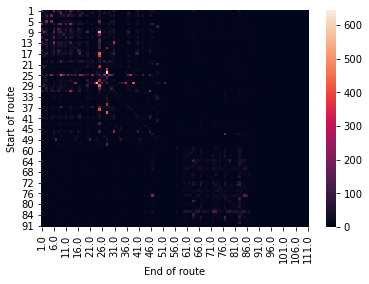

In [2]:
df = pd.read_csv('bdd//rides.csv')

matriz = pd.crosstab(df['start_station_id'], df['end_station_id'], 
                     rownames=['Start of route'], colnames=['End of route'])
image = sn.heatmap(matriz)
image.figure.savefig("matriz.jpg", dpi = 600, bbox_inches = 'tight')

Al ver con detalle la matriz de rutas, se aprecian dos cuadros de tendencia. Se hacen entonces dos matrices, una que muestre el recuadro superior izquierdo, y otra que muestre el recuadro inferior derecho.

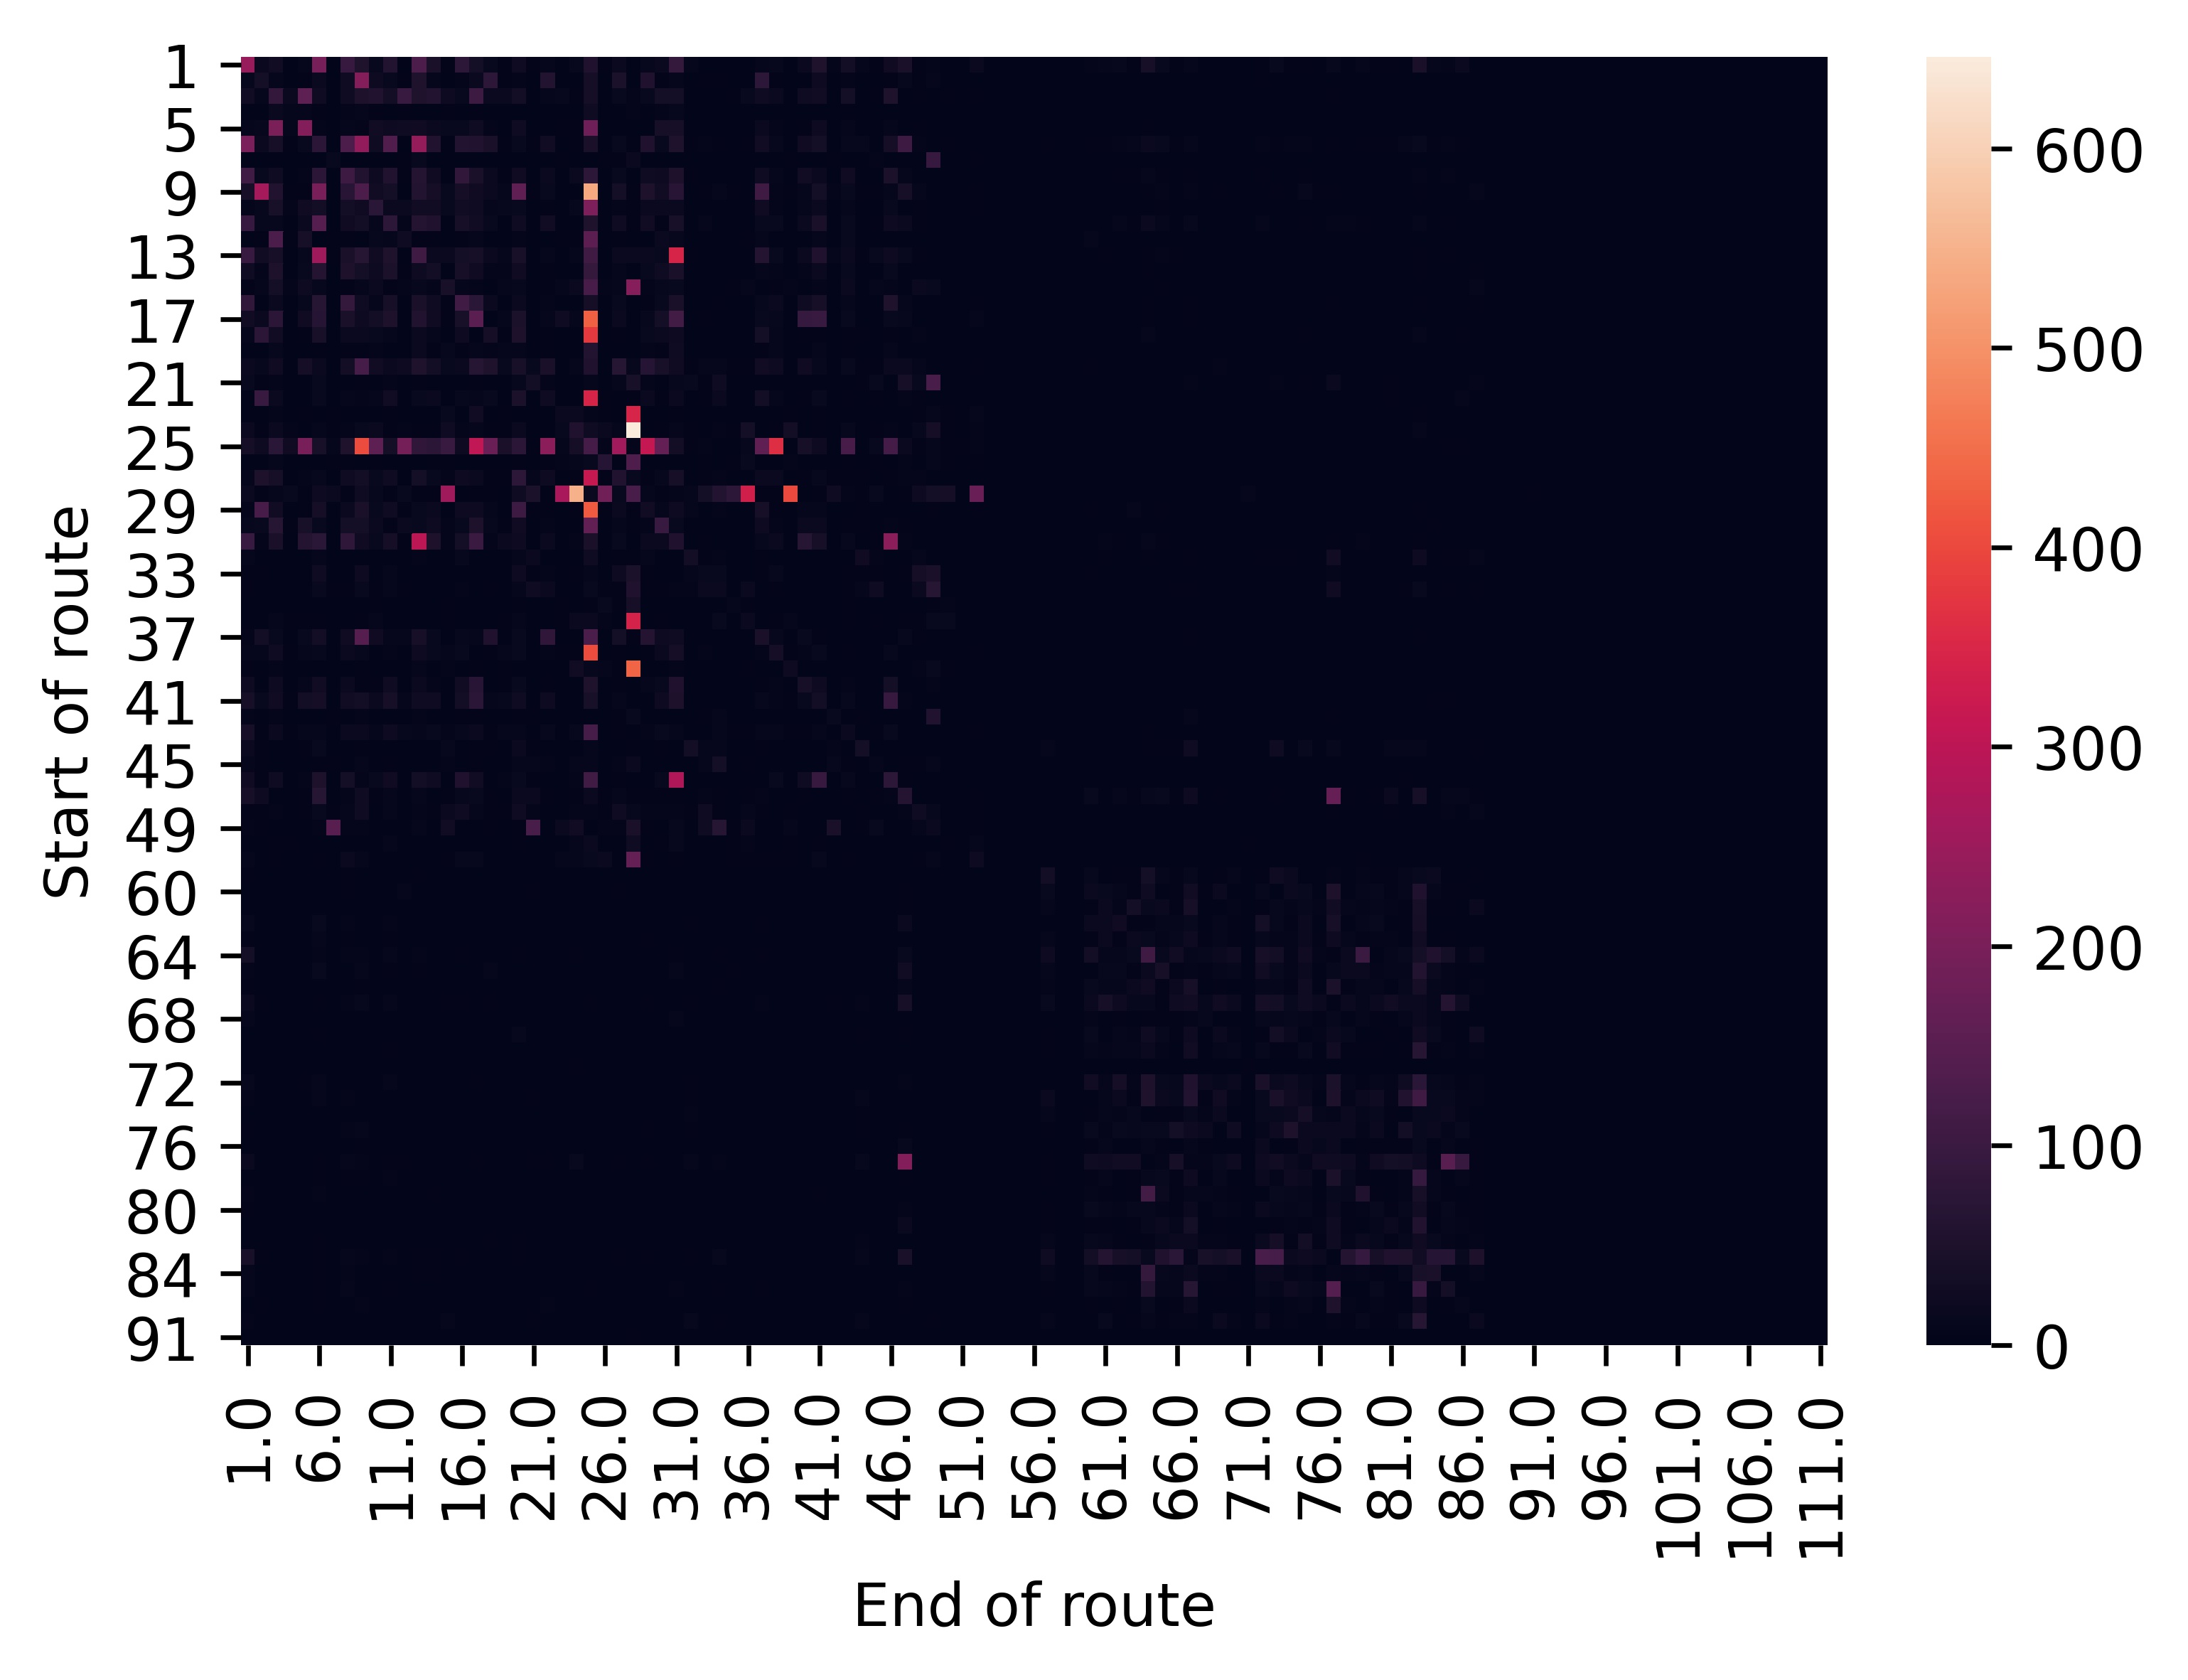

**Como tarea posterior** el estudiar por qué son estos patrones podría generar un área de interés para el negocio.

### Matriz superior izquierda

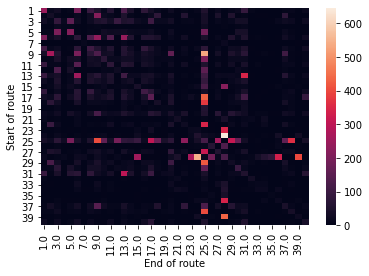

In [3]:
matriz = pd.crosstab(df[df['start_station_id'] <= 40]['start_station_id'], 
                     df[df['end_station_id'] <= 40]['end_station_id'], 
                     rownames=['Start of route'], colnames=['End of route'])
image = sn.heatmap(matriz)
image.figure.savefig("matriz_superior.jpg", dpi = 600, bbox_inches = 'tight')

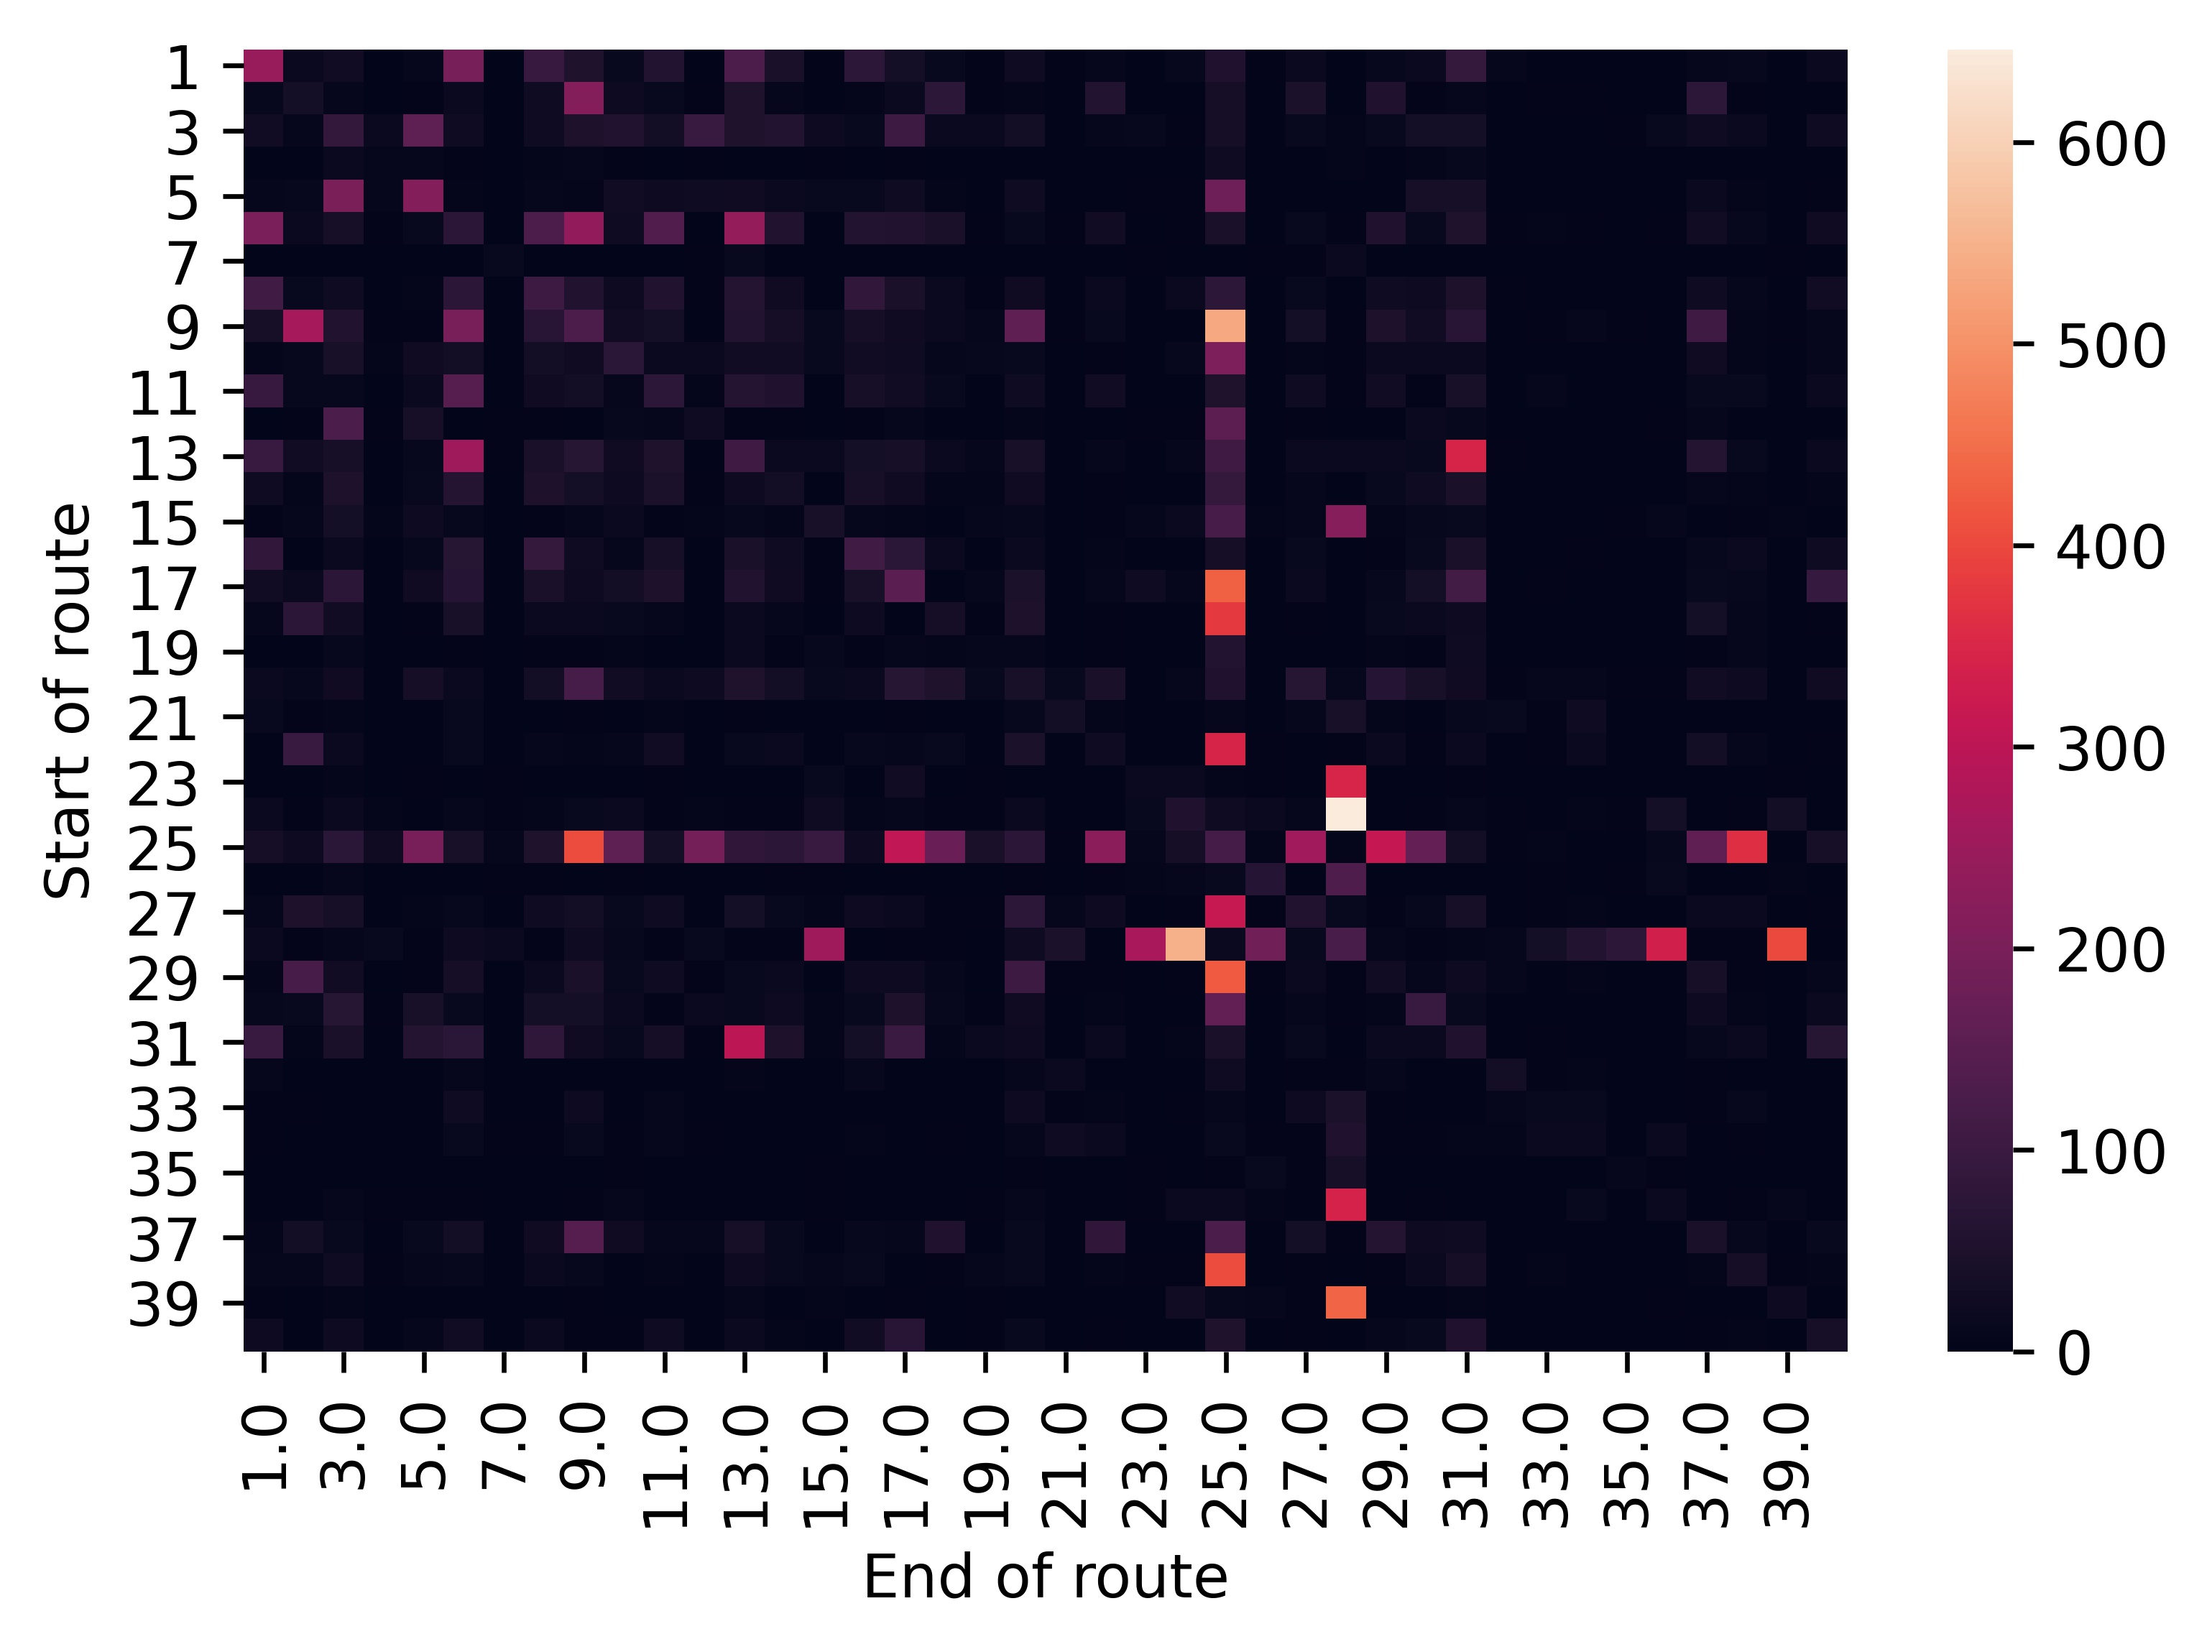

**La ruta más realizada por usuarios** es la que inicia en la estación 24 y termina en la estación 28, es decir, es la **ruta McGinley Square - Sip Ave**.
<br> Detrás de ella podemos mencionar las conexiones entre la estación 9 con la 25 (**Hamilton Park - Grove St PATH**), o la que tienen la 28 y la 24 (**Sip Ave - McGinley Square**) (**¡Es la ruta inversa!**), por ejemplo. Enlistar las rutas requeriría de un proceso más detallado.

### Matriz inferior

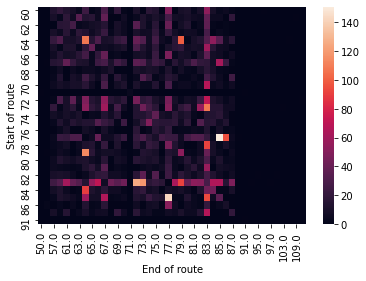

In [4]:
matriz = pd.crosstab(df[df['start_station_id'] >= 60]['start_station_id'], 
                     df[df['end_station_id'] >= 50]['end_station_id'], 
                     rownames=['Start of route'], colnames=['End of route'])
image = sn.heatmap(matriz)
image.figure.savefig("matriz_inferior.jpg", dpi = 600, bbox_inches = 'tight')

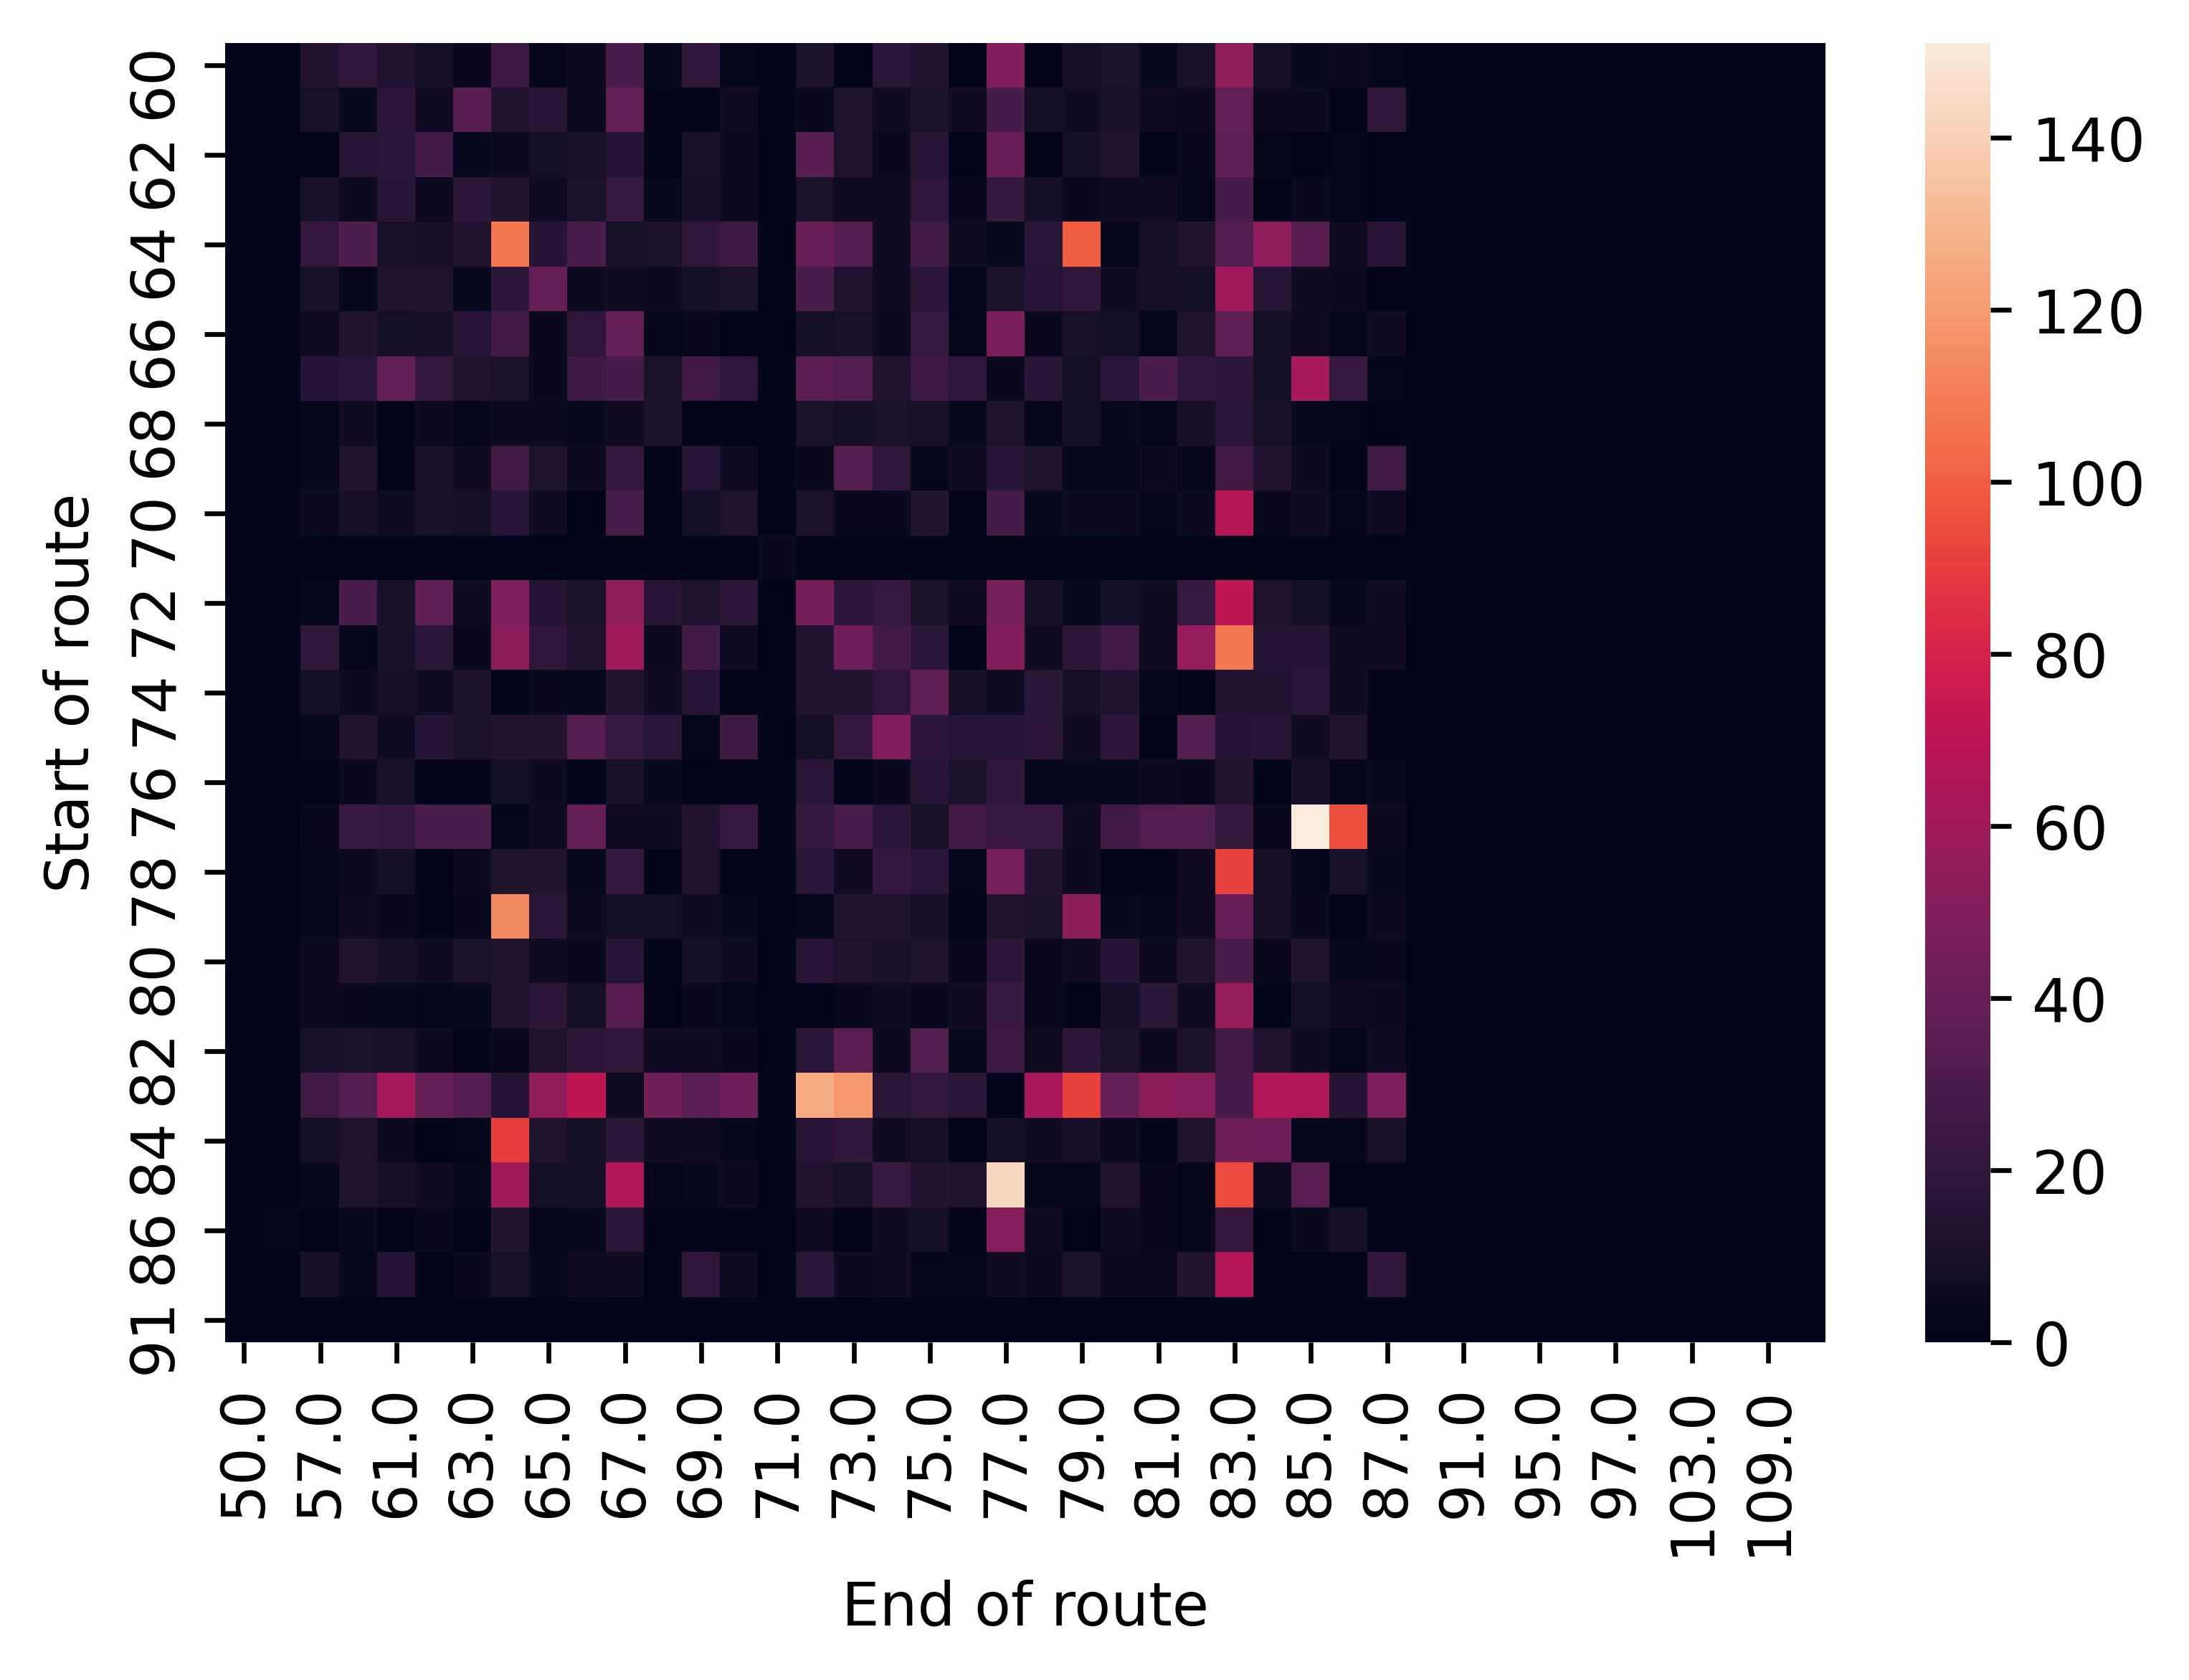

**La ruta más realizada por usuarios sólo para esta sección**, es la que inicia en la estación 77 y termina en la estación 85, es decir, es la **ruta Hoboken Terminal, Hudson St & Hudson Pl - Madison St & 1 St**.
<br> Otra ruta notable es por ejemplo la iniciada en la estación 85 y finalizada en la 77 **¡es la ruta inversa!** (**Madison St & 1 St - ruta Hoboken Terminal, Hudson St & Hudson Pl**).